# Logistic Regression

La Regresión Logística es un método de clasificación supervisada que estima la probabilidad de que una observación pertenezca a una clase.
- Se basa en la función logística (sigmoide), que transforma valores reales en probabilidades entre 0 y 1.
- Es ampliamente usada en problemas de clasificación binaria (ej. spam/no spam, enfermedad/sano).
- Se entrena ajustando parámetros mediante Maximum Likelihood Estimation (MLE).


# Modelo matematico

La función logística se define como:
\sigma (z)=\frac{1}{1+e^{-z}}
Donde:
z=\beta _0+\beta _1x_1+\beta _2x_2+\dots +\beta _nx_n
La probabilidad de pertenecer a la clase positiva es:
P(y=1|x)=\sigma (z)
La decisión de clasificación se toma con un umbral (generalmente 0.5):
\hat {y}=\left\{ \, \begin{array}{ll}\textstyle 1&\textstyle \mathrm{si\  }P(y=1|x)\geq 0.5\\ \textstyle 0&\textstyle \mathrm{si\  }P(y=1|x)<0.5\end{array}\right.




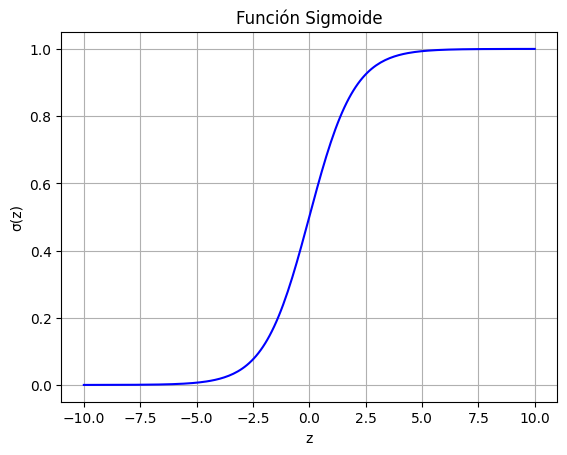

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de entrada
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

# Gráfico
plt.plot(z, sigmoid, color='blue')
plt.title("Función Sigmoide")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

# Clases y Funciones

En scikit-learn:
- LogisticRegression: clase principal para entrenar el modelo.
- fit(X, y): ajusta el modelo a los datos.
- predict(X): devuelve las clases predichas.
- predict_proba(X): devuelve probabilidades de pertenencia a cada clase.
- confusion_matrix, accuracy_score: métricas de evaluación.




# Pipeline

Preprocesamiento

Promedio:
 Feature1    0.01368
Feature2    0.04985
Target      0.50000
dtype: float64
Desviación estándar:
 Feature1    1.044848
Feature2    0.943358
Target      0.502519
dtype: float64
Máximos:
 Feature1    2.456013
Feature2    2.720169
Target      1.000000
dtype: float64
Mínimos:
 Feature1   -1.305956
Feature2   -1.918771
Target      0.000000
dtype: float64


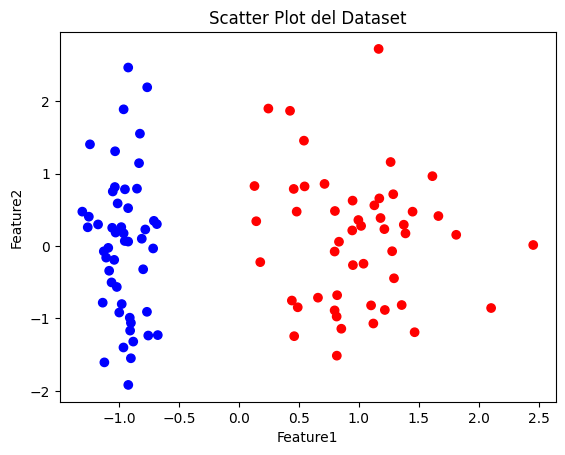

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generar dataset sintético
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, random_state=42)

df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Estadísticos básicos
print("Promedio:\n", df.mean())
print("Desviación estándar:\n", df.std())
print("Máximos:\n", df.max())
print("Mínimos:\n", df.min())

# Gráfico de dispersión
plt.scatter(df['Feature1'], df['Feature2'], c=df['Target'], cmap='bwr')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Scatter Plot del Dataset")
plt.show()

Entrenamiento y Prediccion.

Patrón: [0.5, -1.2]
Clase predicha: 1
Probabilidades -> Clase 0: 0.124, Clase 1: 0.876


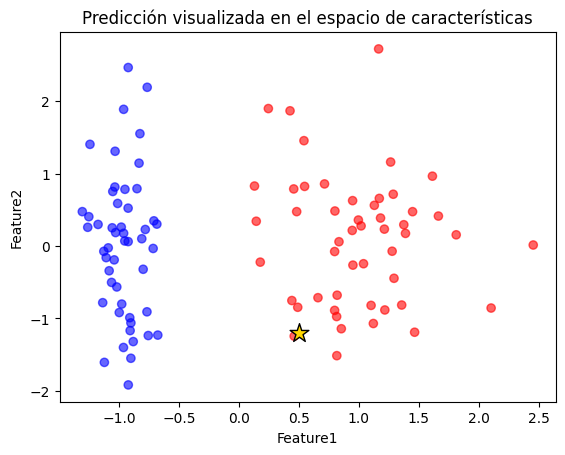

In [32]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo
model = LogisticRegression()
model.fit(X, y)

# Función de predicción con salida en texto y gráfica
def predict_and_plot(pattern):
    # --- Texto ---
    pred_class = model.predict([pattern])[0]
    pred_proba = model.predict_proba([pattern])[0]

    print(f"Patrón: {pattern}")
    print(f"Clase predicha: {pred_class}")
    print(f"Probabilidades -> Clase 0: {pred_proba[0]:.3f}, Clase 1: {pred_proba[1]:.3f}")

    # --- Gráfica ---
    plt.scatter(df['Feature1'], df['Feature2'], c=df['Target'], cmap='bwr', alpha=0.6)
    plt.scatter(pattern[0], pattern[1], c='gold', edgecolors='black', s=200, marker='*')
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title("Predicción visualizada en el espacio de características")
    plt.show()

# Ejemplo de uso
predict_and_plot([0.5, -1.2])

Evaluacion del modelo

Accuracy: 1.00


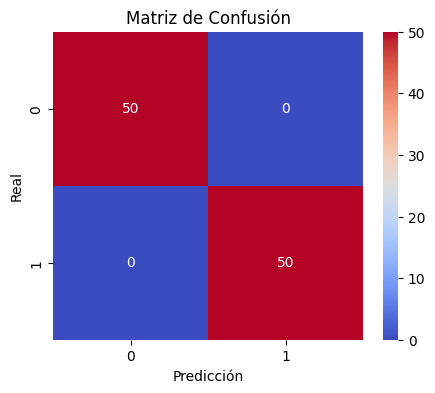

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicciones
y_pred = model.predict(X)

# Matriz de confusión
cm = confusion_matrix(y, y_pred)

#Accuracy
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc:.2f}")


# Gráfico tipo heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

En la matriz de confusion observamos un mapa de calor, donde la diagonal principal son los aciertos de nuestro modelo, mientras que la diagonal exterior son los valores de error.